In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Unemployment.xlsx'
df = pd.read_excel(file_path)

df.head

columns_to_keep = ['FIPS_Code'] + ['State'] + ['Area_Name'] + [f'Unemployment_rate_{year}' for year in range(2001, 2023)] + ['Median_Household_Income_2021']
filtered_df = df[columns_to_keep]

def plot_unemployment_rate(state, county):
    county_area_name = f"{county}, {state}"
    county_data = df[df['Area_Name'] == county_area_name]
    
    if county_data.empty:
        print(f"No data found for {county} in {state}.")
        return

    unemployment_rates = county_data.filter(like='Unemployment_rate_').iloc[0]

    years = [col.split('_')[-1] for col in unemployment_rates.index]

    plt.figure(figsize=(12, 6))
    plt.plot(
        years, 
        unemployment_rates.values, 
        marker='o', 
        linestyle='-', 
        color='teal', 
        linewidth=2, 
        markersize=8
    )

    plt.annotate(
        f"{unemployment_rates.values[0]:.1f}%", 
        (years[0], unemployment_rates.values[0]), 
        textcoords="offset points", 
        xytext=(-10, 10), 
        ha='center',
        fontsize=10,
        color='darkred'
    )
    plt.annotate(
        f"{unemployment_rates.values[-1]:.1f}%", 
        (years[-1], unemployment_rates.values[-1]), 
        textcoords="offset points", 
        xytext=(-10, 10), 
        ha='center',
        fontsize=10,
        color='darkgreen'
    )

    plt.title(f"Unemployment Rate Over Time: {county}, {state}", fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Unemployment Rate (%)", fontsize=14)
    
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()

,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
0,0,US,United States,NaN,NaN,NaN,142601576.0,136904853.0,5696723.0,4.0,...,162229903.0,153544980.0,8684923.0,5.4,164781642.0,158766998.0,6014644.0,3.7,69717.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2147173.0,2047731.0,99442.0,4.6,...,2259349.0,2183330.0,76019.0,3.4,2286028.0,2226670.0,59358.0,2.6,53990.0,100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,21861.0,20971.0,890.0,4.1,...,26545.0,25809.0,736.0,2.8,26789.0,26181.0,608.0,2.3,66444.0,123.1
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,69979.0,67370.0,2609.0,3.7,...,99953.0,97034.0,2919.0,2.9,102849.0,100432.0,2417.0,2.4,65658.0,121.6
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,11449.0,10812.0,637.0,5.6,...,8280.0,7821.0,459.0,5.5,8241.0,7906.0,335.0,4.1,38649.0,71.6


In [ ]:
df.info()

In [13]:
columns_to_keep = ['FIPS_Code'] + ['State'] + ['Area_Name'] + [f'Unemployment_rate_{year}' for year in range(2001, 2023)] + ['Median_Household_Income_2021']

filtered_df = df[columns_to_keep]

In [14]:
filtered_df.head()

,FIPS_Code,State,Area_Name,Unemployment_rate_2001,Unemployment_rate_2002,Unemployment_rate_2003,Unemployment_rate_2004,Unemployment_rate_2005,Unemployment_rate_2006,Unemployment_rate_2007,...,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018,Unemployment_rate_2019,Unemployment_rate_2020,Unemployment_rate_2021,Unemployment_rate_2022,Median_Household_Income_2021
0,0,US,United States,4.7,5.8,6.0,5.5,5.1,4.6,4.6,...,6.2,5.3,4.9,4.4,3.9,3.7,8.1,5.4,3.7,69717.0
1,1000,AL,Alabama,5.2,5.9,6.0,5.6,4.4,4.0,4.1,...,6.7,6.1,5.9,4.5,3.9,3.2,6.4,3.4,2.6,53990.0
2,1001,AL,"Autauga County, AL",4.1,4.8,5.0,4.7,3.8,3.3,3.4,...,5.8,5.2,5.1,4.0,3.6,2.9,5.3,2.8,2.3,66444.0
3,1003,AL,"Baldwin County, AL",4.3,5.0,4.9,5.1,4.0,3.2,3.2,...,6.1,5.6,5.4,4.2,3.6,2.9,6.1,2.9,2.4,65658.0
4,1005,AL,"Barbour County, AL",7.6,7.7,7.1,7.1,5.7,5.6,6.4,...,10.5,8.9,8.4,6.0,5.1,4.0,7.7,5.5,4.1,38649.0


In [16]:
import matplotlib.pyplot as plt

In [20]:
def plot_unemployment_rate(state, county):
    county_area_name = f"{county}, {state}"
    
    county_data = df[df['Area_Name'] == county_area_name]
    
    if county_data.empty:
        print(f"No data found for {county} in {state}.")
        return

    unemployment_rates = county_data.filter(like='Unemployment_rate_').iloc[0]
    
    years = [col.split('_')[-1] for col in unemployment_rates.index]
    
    plt.figure(figsize=(12, 6))
    plt.plot(
        years, 
        unemployment_rates.values, 
        marker='o', 
        linestyle='-', 
        color='teal', 
        linewidth=2, 
        markersize=8
    )
    
    plt.annotate(
        f"{unemployment_rates.values[0]:.1f}%", 
        (years[0], unemployment_rates.values[0]), 
        textcoords="offset points", 
        xytext=(-10, 10), 
        ha='center',
        fontsize=10,
        color='darkred'
    )
    plt.annotate(
        f"{unemployment_rates.values[-1]:.1f}%", 
        (years[-1], unemployment_rates.values[-1]), 
        textcoords="offset points", 
        xytext=(-10, 10), 
        ha='center',
        fontsize=10,
        color='darkgreen'
    )
    
    plt.title(f"Unemployment Rate Over Time: {county}, {state}", fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Unemployment Rate (%)", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

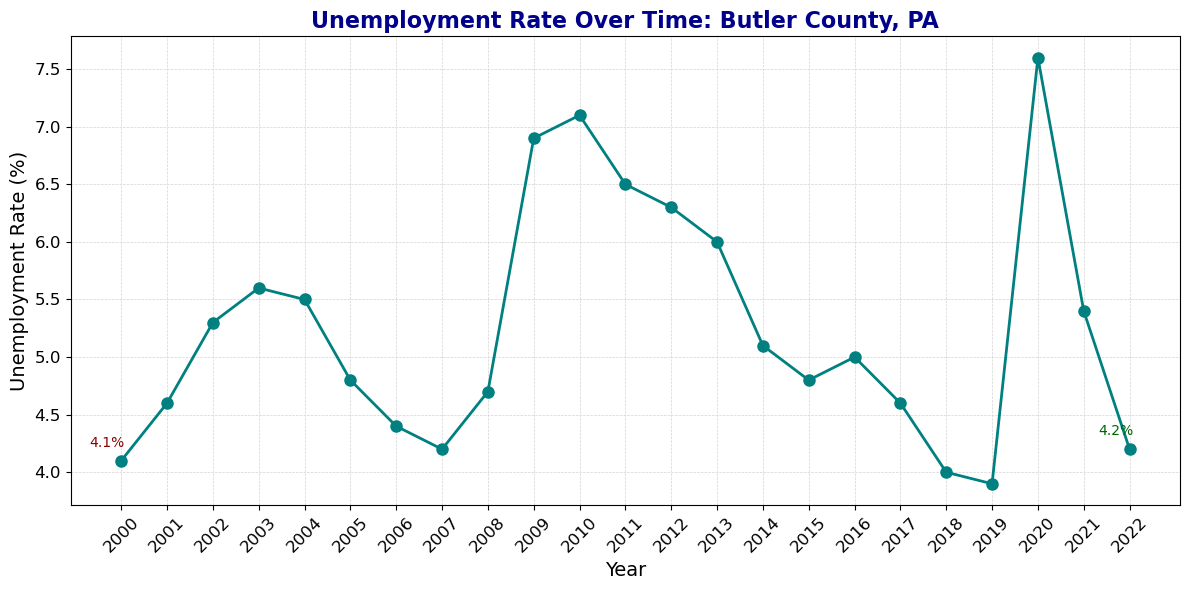

In [21]:
state = "PA"
county = "Butler County"
plot_unemployment_rate(state, county)

In [22]:
filtered_df.to_csv('Unemployment.csv', index=False)